In [2]:
from google.colab import files
uploaded = files.upload()




Saving IMDb Movies India.csv to IMDb Movies India.csv


In [5]:
import pandas as pd

# Try reading with 'ISO-8859-1' encoding (commonly works with IMDb/movie files)
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Display first few rows
print(df.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [6]:
# Movie Rating Prediction Project
# Step-by-step pipeline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (update encoding if necessary)
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Display first few rows
print("\n--- Dataset Preview ---")
print(df.head())

# Show basic info and check for nulls
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Null Value Count ---")
print(df.isnull().sum())

# Select relevant columns (adjust based on dataset)
# Assume we have: 'Genre', 'Director', 'Actors', 'Rating'
cols_to_use = ['Genre', 'Director', 'Actors', 'Rating']
df = df[cols_to_use]

# Drop rows with missing ratings
df.dropna(subset=['Rating'], inplace=True)

# Fill or drop other missing values
df.dropna(inplace=True)  # or use df.fillna('Unknown')

# Encode categorical columns
le_genre = LabelEncoder()
df['Genre_encoded'] = le_genre.fit_transform(df['Genre'])

le_director = LabelEncoder()
df['Director_encoded'] = le_director.fit_transform(df['Director'])

le_actors = LabelEncoder()
df['Actors_encoded'] = le_actors.fit_transform(df['Actors'])

# Define features and target
X = df[['Genre_encoded', 'Director_encoded', 'Actors_encoded']]
y = df['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("\n--- Model Performance ---")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Visualize actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()

# Optional: Show feature importance (coefficients)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n--- Feature Coefficients ---")
print(coeff_df)



--- Dataset Preview ---
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3

KeyError: "['Actors'] not in index"

Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [1]:
import pandas as pd


df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')


df_cleaned = df.dropna()


print("Original shape:", df.shape)
print("After dropping missing values:", df_cleaned.shape)


Original shape: (15509, 10)
After dropping missing values: (5659, 10)


<Figure size 1000x600 with 0 Axes>

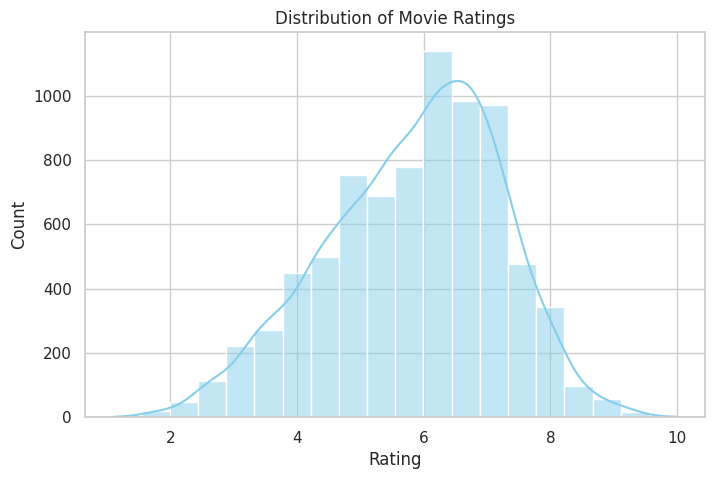

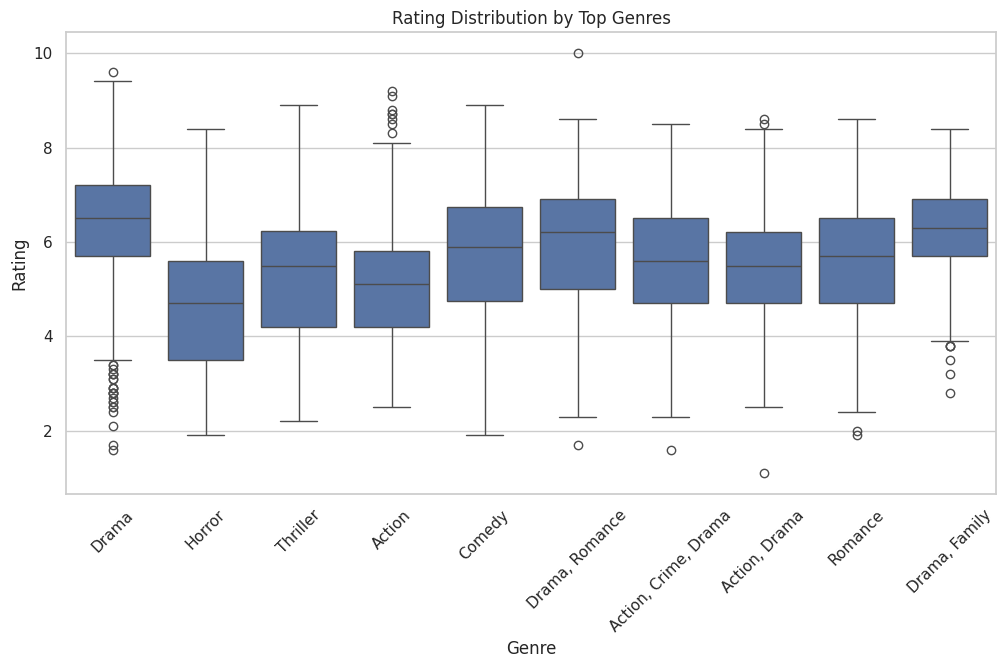

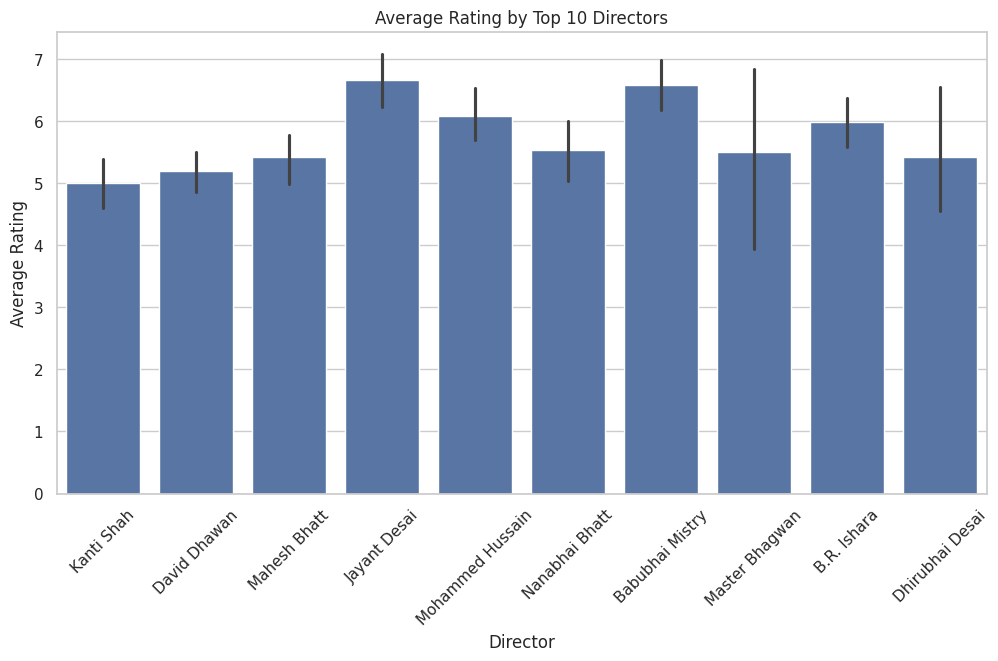

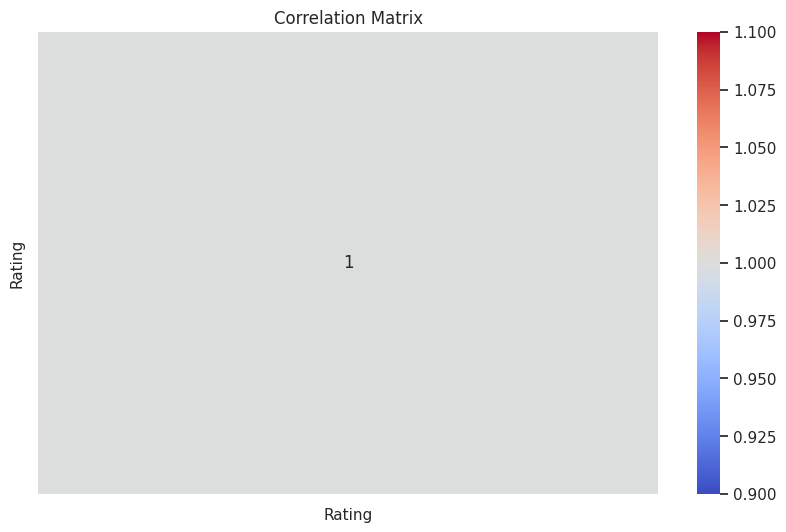

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 2. Average Rating by Genre
plt.figure(figsize=(12, 6))
top_genres = df['Genre'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Genre'].isin(top_genres)], x='Genre', y='Rating')
plt.xticks(rotation=45)
plt.title('Rating Distribution by Top Genres')
plt.ylabel('Rating')
plt.show()

# 3. Average Rating by Director (Top 10)
plt.figure(figsize=(12, 6))
top_directors = df['Director'].value_counts().nlargest(10).index
sns.barplot(data=df[df['Director'].isin(top_directors)], x='Director', y='Rating')
plt.xticks(rotation=45)
plt.title('Average Rating by Top 10 Directors')
plt.ylabel('Average Rating')
plt.show()

# 4. Correlation Heatmap (if numeric features like Year, Votes, Runtime exist)
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
